In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

Loading and splitting the dataset

In [ ]:
cifar10=keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
# print(train_images[:3])
#Normalizing pixel values
train_images,test_images=train_images/255,test_images/255

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170500096/170498071 [==============================] - 2s 0us/step


[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

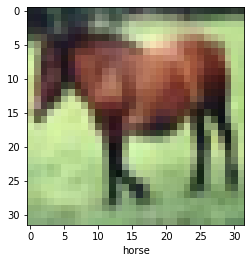

In [ ]:
# Loooking at 1 image
img_index=7
print(train_images)
plt.imshow(train_images[img_index],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[img_index][0]])
plt.show()

 **CNN Architecture**

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3) , activation='relu' , input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3) , activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3) , activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Adding Dense Layers

So far , we've only added a convolutional base , now we need to take these extracted features and add a way to classify them


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))                  # 10 becuse that's the number of classes

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

**Training the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=10,
                  validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5198 - accuracy: 0.4454 - val_loss: 1.2170 - val_accuracy: 0.5648
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1363 - accuracy: 0.5979 - val_loss: 1.0581 - val_accuracy: 0.6302
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9896 - accuracy: 0.6525 - val_loss: 0.9730 - val_accuracy: 0.6595
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8933 - accuracy: 0.6872 - val_loss: 0.9197 - val_accuracy: 0.6828
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8282 - accuracy: 0.7091 - val_loss: 0.8989 - val_accuracy: 0.6921
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7683 - accuracy: 0.7293 - val_loss: 0.8896 - val_accuracy: 0.6951
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7213 - accuracy: 0.7459 - val_loss: 0.8544 -

Evaluating the model

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 3s - loss: 0.8954 - accuracy: 0.6990
